In [1]:
# Importing necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical computations
from nltk.tokenize import word_tokenize  # To tokenize text into words
from nltk.corpus import stopwords  # For accessing stop words (common words to be excluded from processing)
from sklearn.feature_extraction.text import TfidfVectorizer  # To compute TF-IDF (term frequency-inverse document frequency) features
from sklearn.metrics.pairwise import cosine_similarity  # To calculate cosine similarity between vectors
from sklearn.metrics import classification_report  # To evaluate classification performance
import matplotlib.pyplot as plt  # For creating plots and visualizations
import seaborn as sns  # For creating visually appealing statistical graphics
import nltk  # Natural Language Toolkit for NLP tasks
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt


# Downloading required NLTK resources
nltk.download('punkt')  # Download tokenizer model for splitting text into words
nltk.download('stopwords')  # Download predefined list of common stop words

# Confirmation of successful library imports and resource downloads
print("Libraries successfully imported!")

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Libraries successfully imported!


## Phase 1 : Dataset

**Old dataset to which we added new information to improve the result and make it balanced.**

In [2]:
# Load the dataset into a DataFrame using pandas
# Replace the file path with the location of your dataset
df = pd.read_csv("/kaggle/input/dsa-questions-dataset/Geeks_For_Geeks_Questions_Dataset.csv")

# Display information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Question Name      260 non-null    object
 1   Difficulty Level   260 non-null    object
 2   Total Submissions  260 non-null    object
 3   Accuracy           260 non-null    object
 4   Company Tags       236 non-null    object
dtypes: object(5)
memory usage: 10.3+ KB


**We’ve updated the dataset by increasing its size with additional rows. Additionally, we added a column for resources to ensure the data's accuracy and credibility.**

In [3]:
# Load the dataset into a DataFrame using pandas
# Replace the file path with the location of your dataset
df = pd.read_csv("/kaggle/input/dsa-geeks-balanced/Balanced_Realistic_Geeks_For_Geeks_Questions_Dataset.csv")

# Display information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Question Name      740 non-null    object
 1   Difficulty Level   740 non-null    object
 2   Total Submissions  740 non-null    object
 3   Accuracy           740 non-null    object
 4   Company Tags       716 non-null    object
 5   Source             400 non-null    object
dtypes: object(6)
memory usage: 34.8+ KB


In [4]:
# Display the contents of the DataFrame to check the loaded data
df

,Question Name,Difficulty Level,Total Submissions,Accuracy,Company Tags,Source
0,Subarray with given sum,Easy,1M,16.50%,AmazonFacebook+ 2 more,NaN
1,Missing number in array,Easy,887K,29.59%,FlipkartMorgan Stanley+ 11 more,NaN
2,Kadane's Algorithm,Medium,783K,36.28%,ZohoFlipkart+ 22 more,NaN
3,Minimum number of jumps,Medium,673K,11.91%,Moonfrog LabsFlipkart+ 6 more,NaN
4,"Sort an array of 0s, 1s and 2s",Easy,580K,50.58%,PaytmFlipkart+ 15 more,NaN
...,...,...,...,...,...,...
735,Find the nth Fibonacci number using recursion,School,777K,59.14%,Google+17 more,W3Schools
736,Find the nth Fibonacci number using recursion,School,811K,83.89%,Adobe+16 more,LearnYard
737,Find the longest increasing subsequence,School,110K,66.46%,Amazon+10 more,LeetCode Discuss
738,Find the first non-repeating character in a st...,School,865K,58.26%,Flipkart+19 more,LeetCode Discuss


In [5]:
# Drop the 'Source' column from the DataFrame
df = df.drop(columns=['Source'])

# Display the updated DataFrame to verify the column has been removed
df


,Question Name,Difficulty Level,Total Submissions,Accuracy,Company Tags
0,Subarray with given sum,Easy,1M,16.50%,AmazonFacebook+ 2 more
1,Missing number in array,Easy,887K,29.59%,FlipkartMorgan Stanley+ 11 more
2,Kadane's Algorithm,Medium,783K,36.28%,ZohoFlipkart+ 22 more
3,Minimum number of jumps,Medium,673K,11.91%,Moonfrog LabsFlipkart+ 6 more
4,"Sort an array of 0s, 1s and 2s",Easy,580K,50.58%,PaytmFlipkart+ 15 more
...,...,...,...,...,...
735,Find the nth Fibonacci number using recursion,School,777K,59.14%,Google+17 more
736,Find the nth Fibonacci number using recursion,School,811K,83.89%,Adobe+16 more
737,Find the longest increasing subsequence,School,110K,66.46%,Amazon+10 more
738,Find the first non-repeating character in a st...,School,865K,58.26%,Flipkart+19 more


In [7]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'Difficulty Level' column
df['Encoded_Difficulty'] = label_encoder.fit_transform(df['Difficulty Level'])

# Display the mapping of labels to numerical values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Encoding Mapping:", label_mapping)

# Display the updated DataFrame
print(df[['Difficulty Level', 'Encoded_Difficulty']].head())

Label Encoding Mapping: {'Basic': 0, 'Easy': 1, 'Hard': 2, 'Medium': 3, 'School': 4}
  Difficulty Level  Encoded_Difficulty
0             Easy                   1
1             Easy                   1
2           Medium                   3
3           Medium                   3
4             Easy                   1


In [8]:
# Identify duplicate rows in the DataFrame
# Duplicated rows are those with the same values across all columns
duplicates = df[df.duplicated()]

# Print the number of duplicate rows
print(f"Number of duplicate rows: {duplicates.shape[0]}")

# Check if any duplicates exist
if not duplicates.empty:
    # If duplicates are found, print them
    print("\nDuplicate rows:")
    print(duplicates)
else:
    # If no duplicates are found, print a confirmation message
    print("\nNo duplicate rows found in the dataset.")

Number of duplicate rows: 0

No duplicate rows found in the dataset.


In [9]:
# Print the data type of the 'Accuracy' column
print(df['Accuracy'].dtype)

# Print the data type of the 'Total Submissions' column
print(df['Total Submissions'].dtype)

object
object


In [10]:
# Create a formatted string to display all required information
report = f"""
DataFrame Summary
=====================================================================
Shape: {df.shape}
---------------------------------------------------------------------
Columns:{list(df.columns)}
---------------------------------------------------------------------
Missing Values:
{df.isnull().sum().to_string()}
---------------------------------------------------------------------
Information:
"""
print(report)
df.info()


DataFrame Summary
Shape: (740, 6)
---------------------------------------------------------------------
Columns:['Question Name', 'Difficulty Level', 'Total Submissions', 'Accuracy', 'Company Tags', 'Encoded_Difficulty']
---------------------------------------------------------------------
Missing Values:
Question Name          0
Difficulty Level       0
Total Submissions      0
Accuracy               0
Company Tags          24
Encoded_Difficulty     0
---------------------------------------------------------------------
Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Question Name       740 non-null    object
 1   Difficulty Level    740 non-null    object
 2   Total Submissions   740 non-null    object
 3   Accuracy            740 non-null    object
 4   Company Tags        716 non-null    object
 5   Encoded_Diffi

In [11]:
# Replace missing values in the 'Company Tags' column with 'No Tags'
df['Company Tags'] = df['Company Tags'].fillna('No Tags')

# Display the count of missing values in each column after the update
print("Updated Missing Values Count:")
print(df.isnull().sum().to_string())

Updated Missing Values Count:
Question Name         0
Difficulty Level      0
Total Submissions     0
Accuracy              0
Company Tags          0
Encoded_Difficulty    0


In [12]:
#Print the dataset
df

,Question Name,Difficulty Level,Total Submissions,Accuracy,Company Tags,Encoded_Difficulty
0,Subarray with given sum,Easy,1M,16.50%,AmazonFacebook+ 2 more,1
1,Missing number in array,Easy,887K,29.59%,FlipkartMorgan Stanley+ 11 more,1
2,Kadane's Algorithm,Medium,783K,36.28%,ZohoFlipkart+ 22 more,3
3,Minimum number of jumps,Medium,673K,11.91%,Moonfrog LabsFlipkart+ 6 more,3
4,"Sort an array of 0s, 1s and 2s",Easy,580K,50.58%,PaytmFlipkart+ 15 more,1
...,...,...,...,...,...,...
735,Find the nth Fibonacci number using recursion,School,777K,59.14%,Google+17 more,4
736,Find the nth Fibonacci number using recursion,School,811K,83.89%,Adobe+16 more,4
737,Find the longest increasing subsequence,School,110K,66.46%,Amazon+10 more,4
738,Find the first non-repeating character in a st...,School,865K,58.26%,Flipkart+19 more,4


In [13]:
# Define the columns to inspect for unique values
columns_to_check = ['Difficulty Level', 'Company Tags']

# Loop through each column and print its unique values
for column in columns_to_check:
    print(f"\nUnique values in '{column}':")
    print(df[column].unique())
    print("=" * 70)


Unique values in 'Difficulty Level':
['Easy' 'Medium' 'Basic' 'School' 'Hard']

Unique values in 'Company Tags':
['AmazonFacebook+ 2 more' 'FlipkartMorgan Stanley+ 11 more'
 'ZohoFlipkart+ 22 more' 'Moonfrog LabsFlipkart+ 6 more'
 'PaytmFlipkart+ 15 more' 'PayuAdobe' 'FlipkartAccolite+ 6 more'
 'VMWareAccolite+ 8 more' 'PaytmZoho+ 4 more' 'FlipkartAmazon+ 8 more'
 'MicrosoftAdobe' 'AmazonAdobe' 'VMWareFlipkart+ 19 more'
 'FlipkartAmazon+ 5 more' 'PaytmFlipkart+ 12 more' 'InfosysOracle+ 6 more'
 'VMWareMorgan Stanley+ 11 more' 'SAP LabsRockstand'
 'PaytmVMWare+ 16 more' 'FlipkartAmazon+ 2 more' 'PaytmAmazon+ 9 more'
 'FlipkartMorgan Stanley+ 9 more' 'FlipkartAccolite+ 7 more'
 'AmazonSamsung+ 3 more' 'FlipkartMorgan Stanley+ 13 more'
 'FlipkartAmazon+ 3 more' 'AccoliteAmazon+ 3 more'
 'VMWareMicrosoft+ 1 more' 'Morgan StanleyAmazon+ 4 more' 'ZohoRockstand'
 'FlipkartMorgan Stanley+ 10 more' 'Adobe' 'No Tags'
 'AccoliteAmazon+ 2 more' 'Goldman Sachs' 'AmazonGoogle+ 1 more'
 'PaytmZoho+ 

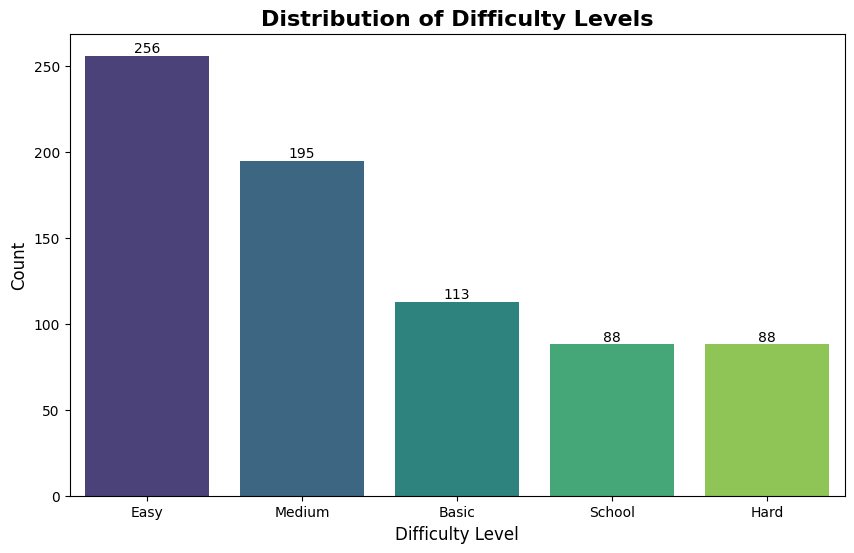

In [14]:
# Set the figure size for the plot
plt.figure(figsize=(10, 6))

# Create a count plot for the 'Difficulty Level' column with a custom color palette
sns.countplot(x='Difficulty Level', data=df, palette='viridis')

# Add a title to the plot with custom formatting
plt.title('Distribution of Difficulty Levels', fontsize=16, fontweight='bold')

# Label the x-axis with custom formatting
plt.xlabel('Difficulty Level', fontsize=12)

# Label the y-axis with custom formatting
plt.ylabel('Count', fontsize=12)

# Display the count values on top of each bar
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2,  # X position
             p.get_height(),                # Y position
             int(p.get_height()),           # Text to display
             ha='center', va='bottom', fontsize=10)  # Alignment and font size

# Show the plot
plt.show()

Data type of 'Accuracy': object


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


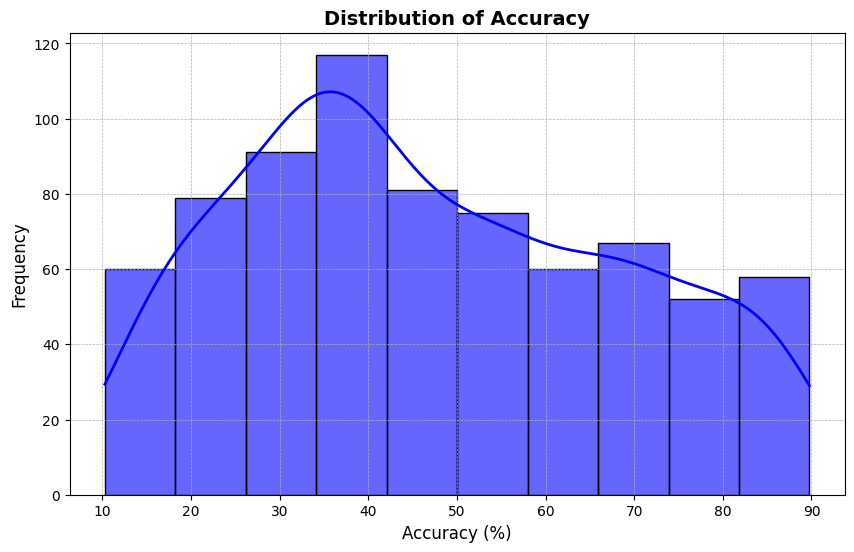

In [15]:
# Check the data type of the 'Accuracy' column
print(f"Data type of 'Accuracy': {df['Accuracy'].dtype}")

# Convert the 'Accuracy' column to string if it's not already
df['Accuracy'] = df['Accuracy'].astype(str)

# Remove the '%' sign and convert the column to float
df['Accuracy'] = df['Accuracy'].str.rstrip('%').astype(float)

# Set the figure size for the histogram
plt.figure(figsize=(10, 6))

# Plot the histogram for the 'Accuracy' column
sns.histplot(
    data=df,
    x='Accuracy',  # Column to visualize
    bins=10,       # Number of bins in the histogram
    kde=True,      # Include a KDE (Kernel Density Estimate) line
    color='blue',  # Set the color of the bars
    alpha=0.6,     # Set transparency for better visualization
    line_kws={'linewidth': 2}  # Customize the KDE line thickness
)

# Add a title and labels to the plot with custom formatting
plt.title('Distribution of Accuracy', fontsize=14, fontweight='bold')
plt.xlabel('Accuracy (%)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add a grid for better readability
plt.grid(visible=True, linestyle='--', linewidth=0.5)

# Show the plot
plt.show()


In [16]:
# Split the 'Company Tags' column into lists of tags using the '+' character as a delimiter
df['Company Tags Split'] = df['Company Tags'].str.split(r'[+]', expand=False)

# Explanation:
# - r'[+]': A regular expression where the '+' character is used as a delimiter.
#   The brackets [] are optional in this case, as '+' is a special regex character.
# - expand=False: Ensures the result is stored as a list in each row of the new column.

# Display the updated DataFrame to verify the changes
df.head()

,Question Name,Difficulty Level,Total Submissions,Accuracy,Company Tags,Encoded_Difficulty,Company Tags Split
0,Subarray with given sum,Easy,1M,16.50,AmazonFacebook+ 2 more,1,"[AmazonFacebook, 2 more]"
1,Missing number in array,Easy,887K,29.59,FlipkartMorgan Stanley+ 11 more,1,"[FlipkartMorgan Stanley, 11 more]"
2,Kadane's Algorithm,Medium,783K,36.28,ZohoFlipkart+ 22 more,3,"[ZohoFlipkart, 22 more]"
3,Minimum number of jumps,Medium,673K,11.91,Moonfrog LabsFlipkart+ 6 more,3,"[Moonfrog LabsFlipkart, 6 more]"
4,"Sort an array of 0s, 1s and 2s",Easy,580K,50.58,PaytmFlipkart+ 15 more,1,"[PaytmFlipkart, 15 more]"


In [17]:
def preprocess_text(text):
    """
    Preprocesses input text by:
    - Converting text to lowercase
    - Tokenizing the text
    - Removing stopwords and non-alphanumeric tokens
    - Returning the cleaned text as a single string
    """
    # Convert text to lowercase
    tokens = word_tokenize(text.lower())
    
    # Load English stopwords
    stop_words = set(stopwords.words('english'))
    
    # Filter out stopwords and non-alphanumeric tokens
    filtered_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    
    # Join the tokens back into a single string
    return ' '.join(filtered_tokens)

# Apply the preprocessing function to the 'Question Name' column
df['Processed_Problem_Statement'] = df['Question Name'].apply(preprocess_text)

# Display sample preprocessed text
print("\nSample Preprocessed Text:")
print(df['Processed_Problem_Statement'].head())



Sample Preprocessed Text:
0      subarray given sum
1    missing number array
2        kadane algorithm
3    minimum number jumps
4     sort array 0s 1s 2s
Name: Processed_Problem_Statement, dtype: object


In [18]:
# Combine multiple columns into a single string column 'Combined_Features'
df['Combined_Features'] = (
    df['Processed_Problem_Statement'] + ' ' +  # Add preprocessed problem statement
    df['Difficulty Level'].astype(str) + ' ' +  # Add 'Difficulty Level' as a string
    df['Total Submissions'].astype(str) + ' ' +  # Add 'Total Submissions' as a string
    df['Accuracy'].astype(str) + ' ' +  # Add 'Accuracy' as a string
    df['Company Tags'].astype(str)  # Add 'Company Tags' as a string
)

# Display sample combined features
print("\nSample Combined Features:")
print(df['Combined_Features'].head())


Sample Combined Features:
0    subarray given sum Easy 1M 16.5 AmazonFacebook...
1    missing number array Easy 887K 29.59 FlipkartM...
2    kadane algorithm Medium 783K 36.28 ZohoFlipkar...
3    minimum number jumps Medium 673K 11.91 Moonfro...
4    sort array 0s 1s 2s Easy 580K 50.58 PaytmFlipk...
Name: Combined_Features, dtype: object


In [19]:
def convert_submissions(value):
    """
    Converts submission count strings into numerical values.
    - 'K' indicates thousands (multiplied by 1e3)
    - 'M' indicates millions (multiplied by 1e6)
    - Plain numbers are converted to floats directly.
    
    Args:
        value (str or int or float): The submission count as a string or number.
        
    Returns:
        float: The numerical representation of the submission count.
    """
    if isinstance(value, str):  # Check if the value is a string
        if 'K' in value:  # If it contains 'K' (thousands)
            return float(value.replace('K', '')) * 1e3
        elif 'M' in value:  # If it contains 'M' (millions)
            return float(value.replace('M', '')) * 1e6
        else:  # For plain numerical strings
            return float(value)
    elif isinstance(value, (int, float)):  # If the value is already numeric
        return float(value)
    else:
        raise ValueError(f"Unexpected value type: {type(value)}")

# Apply the conversion function to the 'Total Submissions' column
df['Total Submissions'] = df['Total Submissions'].apply(convert_submissions)

# Display the updated column to confirm the changes
print("\nUpdated 'Total Submissions':")
print(df['Total Submissions'].head())


Updated 'Total Submissions':
0    1000000.0
1     887000.0
2     783000.0
3     673000.0
4     580000.0
Name: Total Submissions, dtype: float64


In [20]:
#display dataset
df

,Question Name,Difficulty Level,Total Submissions,Accuracy,Company Tags,Encoded_Difficulty,Company Tags Split,Processed_Problem_Statement,Combined_Features
0,Subarray with given sum,Easy,1000000.0,16.50,AmazonFacebook+ 2 more,1,"[AmazonFacebook, 2 more]",subarray given sum,subarray given sum Easy 1M 16.5 AmazonFacebook...
1,Missing number in array,Easy,887000.0,29.59,FlipkartMorgan Stanley+ 11 more,1,"[FlipkartMorgan Stanley, 11 more]",missing number array,missing number array Easy 887K 29.59 FlipkartM...
2,Kadane's Algorithm,Medium,783000.0,36.28,ZohoFlipkart+ 22 more,3,"[ZohoFlipkart, 22 more]",kadane algorithm,kadane algorithm Medium 783K 36.28 ZohoFlipkar...
3,Minimum number of jumps,Medium,673000.0,11.91,Moonfrog LabsFlipkart+ 6 more,3,"[Moonfrog LabsFlipkart, 6 more]",minimum number jumps,minimum number jumps Medium 673K 11.91 Moonfro...
4,"Sort an array of 0s, 1s and 2s",Easy,580000.0,50.58,PaytmFlipkart+ 15 more,1,"[PaytmFlipkart, 15 more]",sort array 0s 1s 2s,sort array 0s 1s 2s Easy 580K 50.58 PaytmFlipk...
...,...,...,...,...,...,...,...,...,...
735,Find the nth Fibonacci number using recursion,School,777000.0,59.14,Google+17 more,4,"[Google, 17 more]",find nth fibonacci number using recursion,find nth fibonacci number using recursion Scho...
736,Find the nth Fibonacci number using recursion,School,811000.0,83.89,Adobe+16 more,4,"[Adobe, 16 more]",find nth fibonacci number using recursion,find nth fibonacci number using recursion Scho...
737,Find the longest increasing subsequence,School,110000.0,66.46,Amazon+10 more,4,"[Amazon, 10 more]",find longest increasing subsequence,find longest increasing subsequence School 110...
738,Find the first non-repeating character in a st...,School,865000.0,58.26,Flipkart+19 more,4,"[Flipkart, 19 more]",find first character string,find first character string School 865K 58.26 ...


In [21]:
# Check the data type of the 'Accuracy' column
print("Data type of 'Accuracy':", df['Accuracy'].dtype)

# Check the data type of the 'Total Submissions' column
print("Data type of 'Total Submissions':", df['Total Submissions'].dtype)

Data type of 'Accuracy': float64
Data type of 'Total Submissions': float64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


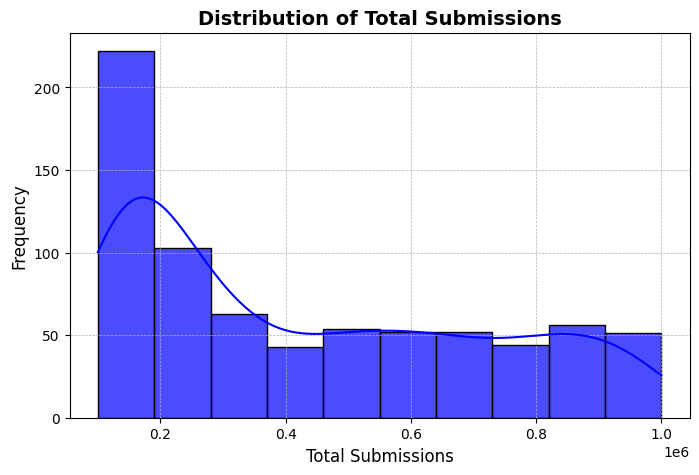

In [22]:
# Set the figure size for the histogram
plt.figure(figsize=(8, 5))

# Plot the histogram for the 'Total Submissions' column with KDE (Kernel Density Estimate)
sns.histplot(
    df['Total Submissions'],  # Data to visualize
    bins=10,                  # Number of bins
    kde=True,                 # Show Kernel Density Estimate curve
    color='blue',             # Set the color for the bars
    alpha=0.7                 # Set the transparency for better readability
)

# Add a title and axis labels with custom formatting
plt.title('Distribution of Total Submissions', fontsize=14, fontweight='bold')
plt.xlabel('Total Submissions', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add a grid to improve visualization
plt.grid(visible=True, linestyle='--', linewidth=0.5)

# Display the plot
plt.show()

## Phase 2 : Content-Based Filtering

In [23]:
# Initialize the TF-IDF Vectorizer
# - stop_words='english': Removes common English stopwords (e.g., "and", "the")
# - ngram_range=(1, 2): Considers unigrams (single words) and bigrams (pairs of consecutive words)
tfidf_vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))

# Fit the vectorizer to the 'Combined_Features' column and transform it into a sparse matrix
# Each row represents a document, and each column represents a term with its TF-IDF weight
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Combined_Features'])

# Compute the cosine similarity matrix
# This measures the similarity between all pairs of documents (rows)
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Optional: Display the shape of the resulting matrices for confirmation
print("TF-IDF Matrix Shape:", tfidf_matrix.shape)
print("Cosine Similarity Matrix Shape:", cosine_sim.shape)


TF-IDF Matrix Shape: (740, 4330)
Cosine Similarity Matrix Shape: (740, 740)


In [24]:
print("TF-IDF Matrix Shape:", tfidf_matrix)

TF-IDF Matrix Shape: <Compressed Sparse Row sparse matrix of dtype 'float64'
	with 12550 stored elements and shape (740, 4330)>
  Coords	Values
  (0, 358)	0.3257001685343152
  (0, 527)	0.3257001685343152
  (0, 2963)	0.3257001685343152
  (0, 4186)	0.2825414742564163
  (0, 3216)	0.3066021420756138
  (0, 4156)	0.3257001685343152
  (0, 2592)	0.3257001685343152
  (0, 350)	0.1713416415781992
  (0, 526)	0.3257001685343152
  (0, 2907)	0.09697849349482324
  (0, 4183)	0.21494679918726803
  (0, 3209)	0.17223884068181178
  (0, 4155)	0.2739538502019349
  (1, 4123)	0.2557114258881814
  (1, 3196)	0.21055858470518515
  (1, 1663)	0.28419969684882035
  (1, 829)	0.28419969684882035
  (1, 2347)	0.28419969684882035
  (1, 3092)	0.2675351266264631
  (1, 2623)	0.22238228544346686
  (1, 3749)	0.28419969684882035
  (1, 3715)	0.28419969684882035
  (1, 101)	0.16006057461618486
  (1, 4121)	0.20138740990819168
  (1, 3195)	0.21055858470518515
  :	:
  (738, 4145)	0.26251690366521724
  (738, 3187)	0.30186114699791683


In [25]:
# Print a sample of the matrix (e.g., first 5 rows and columns)
print("Sample Cosine Similarity Matrix (First 5 Rows):")
print(cosine_sim[:5, :5])  # Display a 5x5 subset

Sample Cosine Similarity Matrix (First 5 Rows):
[[1.         0.00820647 0.         0.         0.00739729]
 [0.00820647 1.         0.         0.0437015  0.02393751]
 [0.         0.         1.         0.0093406  0.        ]
 [0.         0.0437015  0.0093406  1.         0.        ]
 [0.00739729 0.02393751 0.         0.         1.        ]]


In [27]:
def recommend_dsa_questions(title, df, cosine_sim, top_n=5):
    """
    Recommends DSA (Data Structures and Algorithms) questions based on cosine similarity.

    Args:
        title (str): The title of the question for which recommendations are required.
        df (pd.DataFrame): The dataset containing questions.
        cosine_sim (ndarray): The cosine similarity matrix.
        top_n (int): Number of top recommendations to return.

    Returns:
        list: A list of tuples containing recommended question titles and their similarity scores.
    """
    # Check if the input title exists in the dataset
    if title not in df['Question Name'].values:
        print(f"Error: '{title}' not found in the dataset.")
        return []

    # Get the index of the input question
    idx = df[df['Question Name'] == title].index[0]

    # Retrieve similarity scores for the input question
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the scores in descending order of similarity
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Exclude the input question itself and select the top N recommendations
    sim_scores = sim_scores[1:top_n + 1]

    # Retrieve the question titles and similarity scores for the recommendations
    recommendations = [(df.iloc[i[0]]['Question Name'], i[1]) for i in sim_scores]
    return recommendations

In [28]:
# Define the question for which you want recommendations
question_name = "Binary Search"

# Get recommendations for the specified question
recommendations = recommend_dsa_questions(question_name, df, cosine_sim, top_n=5)

# Display the recommendations
if recommendations:
    print(f"\nRecommendations for '{question_name}':")
    for idx, (question, score) in enumerate(recommendations, start=1):
        print(f"{idx}. {question} (Similarity Score: {score:.2f})")
else:
    print(f"No recommendations available for '{question_name}'.")


Recommendations for 'Binary Search':
1. Check if a given binary tree is balanced (Similarity Score: 0.12)
2. Search an Element in an array (Similarity Score: 0.09)
3. Find the first non-repeating character in a string (Similarity Score: 0.07)
4. Search in a matrix (Similarity Score: 0.07)
5. Search in a Rotated Array (Similarity Score: 0.07)


In [30]:
true_labels = []  # List to store true difficulty levels
predicted_labels = []  # List to store predicted difficulty levels

# Loop through each question in the dataset
for question in df['Question Name']:
    # Get the true label (difficulty level) for the current question
    true_label = df.loc[df['Question Name'] == question, 'Difficulty Level'].values[0]
    true_labels.append(true_label)

    # Get recommendations for the current question
    recommendations = recommend_dsa_questions(question, df, cosine_sim, top_n=1)

    # If recommendations exist, get the difficulty level of the top recommendation
    if recommendations:
        top_rec_question = recommendations[0][0]  # Get the top recommended question name
        predicted_label = df.loc[df['Question Name'] == top_rec_question, 'Difficulty Level'].values[0]
    else:
        predicted_label = "Unknown"  # Fallback if no recommendations exist

    # Append the predicted label to the list
    predicted_labels.append(predicted_label)

# Evaluate the recommendation system using classification metrics
print("\nEvaluating Recommendation System Based on Difficulty Level:")
print(classification_report(true_labels, predicted_labels, target_names=df['Difficulty Level'].unique()))


Evaluating Recommendation System Based on Difficulty Level:
              precision    recall  f1-score   support

        Easy       0.73      0.33      0.46        33
      Medium       0.90      0.97      0.93       540
       Basic       0.00      0.00      0.00         8
      School       0.82      0.72      0.77       151
        Hard       0.44      0.50      0.47         8

    accuracy                           0.87       740
   macro avg       0.58      0.50      0.53       740
weighted avg       0.86      0.87      0.86       740



**EXTRA WORK NOT INCLUDED IN THE PAPER**

**Hyperparamter and Evalution-ML**

In [31]:
# Step 1: Prepare Features (X) and Labels (y)
# Convert sparse TF-IDF matrix to dense
X_dense = tfidf_matrix.toarray()  # Converts the sparse TF-IDF matrix into a dense array

# Scale the features
scaler = StandardScaler()  # Initializes a scaler to standardize features
X_scaled = scaler.fit_transform(X_dense)  # Scales the dense matrix (mean=0, std=1)

# Encode the labels (true_labels) into numeric form
label_encoder = LabelEncoder()  # Encodes target labels with values between 0 and n_classes-1
y_encoded = label_encoder.fit_transform(true_labels)  # Encodes the true labels into integers

# Step 2: Define Parameter Distributions
# Define a range of possible alpha values for Ridge regression
param_distributions = {'alpha': np.logspace(-2, 3, 50)}  # Logarithmically spaced values from 0.01 to 1000

# Step 3: Initialize Ridge Model and RandomizedSearchCV
ridge_model = Ridge()  # Initializes the Ridge regression model

random_search = RandomizedSearchCV(
    estimator=ridge_model,            # Ridge regression as the base model
    param_distributions=param_distributions,  # Distribution of hyperparameters
    n_iter=20,                        # Number of random samples to evaluate
    cv=5,                             # 5-fold cross-validation
    scoring='r2',                     # Use R² as the evaluation metric
    n_jobs=-1,                        # Use all available processors for parallel computation
    random_state=42                   # Ensures reproducibility of results
)

# Step 4: Perform Hyperparameter Tuning
# Fit the model using RandomizedSearchCV to find the best alpha
random_search.fit(X_scaled, y_encoded)

# Step 5: Extract the Best Alpha and Score
# Retrieve the best alpha value and the corresponding R² score
best_alpha = random_search.best_params_['alpha']  # Best alpha value
best_score = random_search.best_score_           # Best cross-validation R² score

# Print results
print("Best alpha value:", best_alpha)
print("Best cross-validation R2 score:", best_score)


Best alpha value: 0.020235896477251575
Best cross-validation R2 score: 0.3152956503811294


In [33]:
from sklearn.linear_model import Ridge
import numpy as np
from sklearn.metrics import classification_report

# Step 1: Train the final model using the best alpha
# Initialize the Ridge model with the best alpha value from hyperparameter tuning
final_model = Ridge(alpha=best_alpha)

# Fit the model on the scaled features and encoded labels
final_model.fit(X_scaled, y_encoded)

# Step 2: Evaluate the model
# Initialize lists for true labels and predicted labels
true_labels = []  # To store the actual difficulty levels
predicted_labels = []  # To store the predicted difficulty levels

# Loop through each question in the dataset
for question in df['Question Name']:
    # Get the true label (difficulty level) for the current question
    true_label = df.loc[df['Question Name'] == question, 'Difficulty Level'].values[0]
    true_labels.append(true_label)

    # Get the index of the current question in the dataset
    idx = df[df['Question Name'] == question].index[0]

    # Scale the feature vector for the current question
    feature_vector = X_scaled[idx].reshape(1, -1)  # Reshape for model prediction (1 sample, multiple features)

    # Predict the difficulty level using the final Ridge model
    prediction_score = final_model.predict(feature_vector)

    # Round the prediction score to the nearest integer and decode it back to the original label
    predicted_label_index = np.round(prediction_score).astype(int)[0]

    # Fallback if the prediction index is out of bounds
    if predicted_label_index < 0 or predicted_label_index >= len(label_encoder.classes_):
        predicted_label = "Unknown"
    else:
        # Convert the numerical prediction back to the original label (difficulty level)
        predicted_label = label_encoder.inverse_transform([predicted_label_index])[0]

    predicted_labels.append(predicted_label)

# Step 3: Generate the classification report
# Generate the classification report using the true and predicted labels
print("\nEvaluating Ridge Regression Model Based on Difficulty Level:")
print(classification_report(true_labels, predicted_labels, target_names=df['Difficulty Level'].unique()))


Evaluating Ridge Regression Model Based on Difficulty Level:
              precision    recall  f1-score   support

        Easy       1.00      1.00      1.00        33
      Medium       1.00      1.00      1.00       540
       Basic       1.00      1.00      1.00         8
      School       1.00      1.00      1.00       151
        Hard       1.00      1.00      1.00         8

    accuracy                           1.00       740
   macro avg       1.00      1.00      1.00       740
weighted avg       1.00      1.00      1.00       740



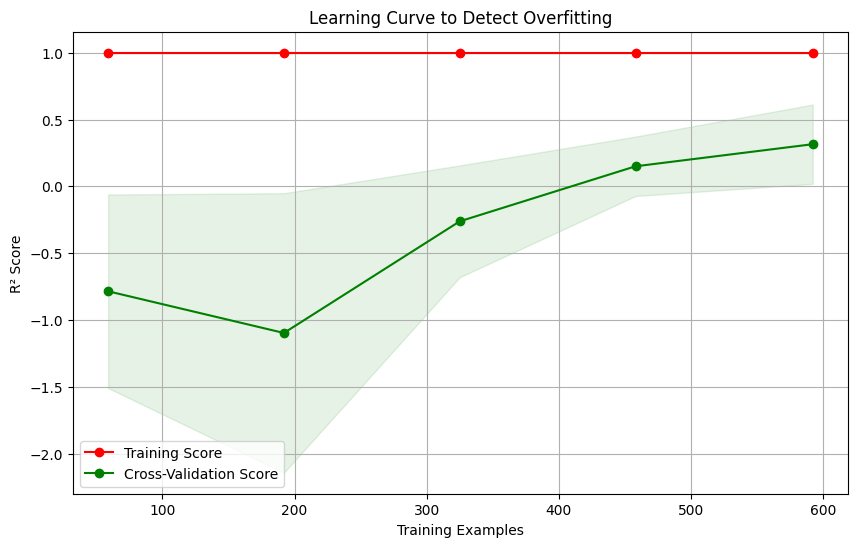

In [35]:
from sklearn.model_selection import learning_curve

# Step 1: Prepare the learning curve
# Generate learning curves for the Ridge model
# - train_sizes: Array of training set sizes (percentages of the data)
# - train_scores: R² scores on the training sets
# - test_scores: R² scores on the validation sets
train_sizes, train_scores, test_scores = learning_curve(
    final_model,                    # The trained Ridge regression model
    X_scaled,                       # Scaled feature set
    y_encoded,                      # Encoded target labels
    cv=5,                           # 5-fold cross-validation
    scoring='r2',                   # Scoring metric (R²)
    n_jobs=-1,                      # Use all available processors
    train_sizes=np.linspace(0.1, 1.0, 5)  # Proportions of the training set (10% to 100%)
)

# Step 2: Calculate mean and standard deviation of scores
# Mean and standard deviation for training scores
train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)

# Mean and standard deviation for validation scores
test_scores_mean = test_scores.mean(axis=1)
test_scores_std = test_scores.std(axis=1)

# Step 3: Plot the learning curve
plt.figure(figsize=(10, 6))  # Set figure size
plt.title("Learning Curve to Detect Overfitting")  # Plot title
plt.xlabel("Training Examples")  # X-axis label
plt.ylabel("R² Score")  # Y-axis label
plt.grid()  # Add grid for better readability

# Plot training scores with confidence interval
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")

# Plot validation scores with confidence interval
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-Validation Score")

# Add legend to differentiate training and validation scores
plt.legend(loc="best")

# Display the plot
plt.show()

## Phase 3 :  Hybrid Recommendation System

**EXTRA WORK NOT INCLUDED IN THE PAPER**

In [36]:
# Step 1: Preprocess 'Total Submissions'
# Ensure 'Total Submissions' column is a string before replacing and evaluating
df['Total Submissions'] = (
    df['Total Submissions']
    .astype(str)  # Convert to string to handle non-string cases
    .replace({'K': '*1e3', 'M': '*1e6'}, regex=True)  # Replace 'K' and 'M' with multipliers
    .map(lambda x: eval(x))  # Evaluate the mathematical expression (e.g., '5*1e3' becomes 5000)
    .astype(int)  # Convert the evaluated results into integers
)

# Step 2: Simulate user-item interaction matrix
# Create a dummy interaction matrix (simulated user-item ratings based on 'Accuracy')
np.random.seed(42)  # Set seed for reproducibility
users = ['User1', 'User2', 'User3', 'User4']  # Simulated users
interaction_data = {user: np.random.randint(0, 6, len(df)) for user in users}  # Random ratings between 0 and 5
interaction_df = pd.DataFrame(interaction_data, index=df['Question Name']).T  # Create user-item DataFrame

# Step 3: Normalize the interaction matrix
# Use StandardScaler to normalize user ratings to mean=0 and std=1
scaler = StandardScaler()
normalized_data = scaler.fit_transform(interaction_df.fillna(0))  # Handle NaNs with 0 before scaling

# Step 4: Compute item similarity
# Calculate cosine similarity between items (questions) based on normalized data
item_similarity = cosine_similarity(normalized_data.T)  # Transpose to compute item similarity
item_similarity_df = pd.DataFrame(
    item_similarity, index=interaction_df.columns, columns=interaction_df.columns
)  # Store as a DataFrame for readability

# Step 5: Recommend questions to a user
def recommend_questions(user, interaction_matrix, similarity_matrix, top_n=3):
    """
    Recommend top N questions to a user based on item similarity.

    Args:
        user (str): User for whom recommendations are being generated.
        interaction_matrix (pd.DataFrame): User-item interaction matrix.
        similarity_matrix (pd.DataFrame): Item similarity matrix.
        top_n (int): Number of recommendations to generate.

    Returns:
        pd.Series: Top N recommended items with their scores.
    """
    # Get user's interaction data (ratings)
    user_ratings = interaction_matrix.loc[user]

    # Compute scores based on weighted sum of similarities
    scores = similarity_matrix.dot(user_ratings).div(similarity_matrix.sum(axis=1))

    # Sort scores in descending order
    scores = scores.sort_values(ascending=False)

    # Exclude items the user has already interacted with (rated > 0)
    recommended_items = scores[scores.index.difference(user_ratings[user_ratings > 0].index)]

    # Return the top N recommended items
    return recommended_items.head(top_n)

# Example: Recommend for 'User1'
user_to_recommend = 'User1'
recommendations = recommend_questions(user_to_recommend, interaction_df, item_similarity_df)

# Display the recommendations
print(f"Recommendations for {user_to_recommend}:")
print(recommendations)


Recommendations for User1:
Question Name
0 - 1 Knapsack Problem               27.010160
Alternate positive and negativ...    16.864564
Arithmetic Number                   -52.154513
dtype: float64


Hybird

In [37]:
# Step 3: Hybrid Recommendation Function
def hybrid_recommendation(user, question_title, interaction_matrix, similarity_matrix, df, cosine_sim, alpha=0.5, top_n=5):
    """
    Generate hybrid recommendations for a user based on a combination of content-based and collaborative filtering scores.

    Args:
        user (str): The user for whom recommendations are being generated.
        question_title (str): The question title to base content-based recommendations on.
        interaction_matrix (pd.DataFrame): User-item interaction matrix.
        similarity_matrix (pd.DataFrame): Item similarity matrix for collaborative filtering.
        df (pd.DataFrame): DataFrame containing question metadata.
        cosine_sim (np.ndarray): Content-based similarity matrix.
        alpha (float): Weight for content-based filtering in the hybrid score (default is 0.5).
        top_n (int): Number of top recommendations to return.

    Returns:
        list: A list of tuples containing recommended question names and their hybrid scores.
    """
    # Step 3.1: Content-Based Filtering (CBF) Scores
    # Get the index of the given question title
    question_idx = df[df['Question Name'] == question_title].index[0]
    # Get cosine similarity scores for the given question
    cbf_scores = cosine_sim[question_idx]
    # Normalize the CBF scores using a scaler
    cbf_scores = scaler.fit_transform(cbf_scores.reshape(-1, 1)).flatten()

    # Step 3.2: Collaborative Filtering (CF) Scores
    # Get user ratings from the interaction matrix
    user_ratings = interaction_matrix.loc[user]
    # Compute collaborative filtering scores by taking the dot product with the similarity matrix
    cf_scores = similarity_matrix.dot(user_ratings).div(similarity_matrix.sum(axis=1))
    cf_scores = cf_scores.fillna(0)  # Handle any NaN values
    # Normalize the CF scores using a scaler
    cf_scores = scaler.fit_transform(cf_scores.values.reshape(-1, 1)).flatten()

    # Step 3.3: Combine Scores (Hybrid)
    # Combine CBF and CF scores using the alpha parameter
    hybrid_scores = alpha * cbf_scores + (1 - alpha) * cf_scores

    # Step 3.4: Rank Items and Return Recommendations
    # Sort indices of items based on hybrid scores in descending order
    recommendation_indices = hybrid_scores.argsort()[::-1]
    recommendations = []
    for idx in recommendation_indices:
        if len(recommendations) >= top_n:  # Stop when we have enough recommendations
            break
        question_name = df.iloc[idx]['Question Name']  # Get the question name for the current index
        # Exclude items the user has already rated
        if question_name not in user_ratings[user_ratings > 0].index:
            recommendations.append((question_name, hybrid_scores[idx]))

    return recommendations

# Example: Get hybrid recommendations for a user and question
user_to_recommend = 'User1'
question_to_query = "Binary Search"
hybrid_recommendations = hybrid_recommendation(
    user=user_to_recommend,
    question_title=question_to_query,
    interaction_matrix=interaction_df,
    similarity_matrix=item_similarity_df,
    df=df,
    cosine_sim=cosine_sim,
    alpha=0.5,  # 50% weight for both CBF and CF
    top_n=5
)

# Display Recommendations
print(f"Hybrid Recommendations for {user_to_recommend} based on '{question_to_query}':")
for rec in hybrid_recommendations:
    print(f"Question: {rec[0]}, Hybrid Score: {rec[1]:.4f}")


Hybrid Recommendations for User1 based on 'Binary Search':
Question: Find length of Loop, Hybrid Score: 0.3572
Question: Intersection Point in Y Shaped..., Hybrid Score: 0.3523
Question: Bottom View of Binary Tree, Hybrid Score: 0.2222
Question: Inorder Traversal, Hybrid Score: 0.1613
Question: Prime Number, Hybrid Score: 0.1229


In [38]:
# Evaluation for Hybrid Model
true_labels = []
predicted_labels = []

for question in df['Question Name']:
    true_label = df.loc[df['Question Name'] == question, 'Difficulty Level'].values[0]
    true_labels.append(true_label)

    recommendations = hybrid_recommendation(
        user="User1",  # Example user
        question_title=question,
        interaction_matrix=interaction_df,
        similarity_matrix=item_similarity_df,
        df=df,
        cosine_sim=cosine_sim,
        alpha=0.5,
        top_n=1
    )

    if recommendations:
        top_rec_question = recommendations[0][0]
        predicted_label = df.loc[df['Question Name'] == top_rec_question, 'Difficulty Level'].values[0]
    else:
        predicted_label = "Unknown"

    predicted_labels.append(predicted_label)

# Classification Report
print("\nEvaluating Hybrid Recommendation System Based on Difficulty Level:")
print(classification_report(true_labels, predicted_labels, target_names=df['Difficulty Level'].unique()))


Evaluating Hybrid Recommendation System Based on Difficulty Level:
              precision    recall  f1-score   support

        Easy       0.21      0.42      0.28        33
      Medium       0.88      0.38      0.53       540
       Basic       0.00      0.00      0.00         8
      School       0.28      0.81      0.42       151
        Hard       0.43      0.38      0.40         8

    accuracy                           0.47       740
   macro avg       0.36      0.40      0.33       740
weighted avg       0.71      0.47      0.49       740



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Done by: Areej Showail , Luluwa Modeer , Zahra Rasheed**

**3 Decumber 2024**